In [338]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymysql

# your username and password go here!
creds = {'user': 'brian', 
         'pswd': 'farley'} 


connection = pymysql.connect(host="atriskwiki.cbprs6vpqcbz.us-west-1.rds.amazonaws.com",
                            user=creds['user'],
                            password=creds['pswd'],
                            port=3306,
                            db="atriskwiki",
                            charset="utf8")

cur = connection.cursor()


In [3]:
col_list = ['page_len','page_touched']
colQ = ",".join(col_list)
selectQ = "SELECT {} FROM core WHERE page_is_ep = 1".format(colQ)
cur.execute(selectQ)

epa_len_and_time = pd.DataFrame(list(cur.fetchall()),columns=col_list)
epa_len_and_time

,page_len,page_touched
0,146470,20160705210334
1,19399,20160709170824
2,171988,20160709073542
3,109151,20160708133344
4,126233,20160704191912
5,66673,20160705100358
6,131729,20160708072835
7,48260,20160705100358
8,43130,20160704191912
9,89048,20160709150440


In [4]:
sample_len_and_time = pd.read_csv("random_article_sample_2_100k.csv")

In [5]:
sample_len_and_time

,page_id,page_len,page_touched
0,2979744,4716,20160704191912
1,2033035,7381,20160704191912
2,46465952,2701,20160625013352
3,42491233,33474,20160709190014
4,1646723,10393,20160706102845
5,871012,54813,20160630081119
6,20688874,2748,20160717082842
7,13718808,75773,20160712055935
8,43007233,8903,20160711111607
9,23204456,2173,20160710122901


In [6]:
def WikiTimeToUsefulTime(x):
    x = str(x)
    year = x[:4]
    month = x[4:6]
    day = x[6:8]
    return "{}-{}-{}".format(year,month,day)

epa_len_and_time['page_touched'] = pd.Series([pd.to_datetime(WikiTimeToUsefulTime(x)) for x in epa_len_and_time['page_touched']])
sample_len_and_time['page_touched'] = pd.Series([pd.to_datetime(WikiTimeToUsefulTime(x))
                                                for x in sample_len_and_time['page_touched']])

In [35]:
def CalcDayDiff(x, t0=pd.Timestamp("2016-07-10")):
    return (t0 - x) / np.timedelta64(1,"D")

In [52]:
epa_len_and_time['days_since_touch'] = pd.Series([CalcDayDiff(x) for x in epa_len_and_time['page_touched']])
sample_len_and_time['days_since_touch'] = pd.Series([CalcDayDiff(x, pd.Timestamp("2016-07-18")) for x in sample_len_and_time['page_touched']])

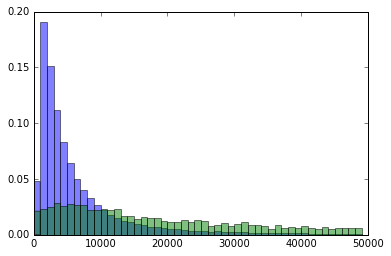

In [186]:
plt.figure()
len_bins = np.arange(0,50000,1000)
s_weights = np.ones_like(sample_len_and_time['page_len'])/len(sample_len_and_time['page_len'])
plt.hist(sample_len_and_time['page_len'],alpha=0.5,color='b',bins=len_bins,weights=s_weights)
e_weights = np.ones_like(epa_len_and_time['page_len'])/len(epa_len_and_time['page_len'])
plt.hist(epa_len_and_time['page_len'],alpha=0.5,color='g',bins=len_bins,weights=e_weights)
plt.show()

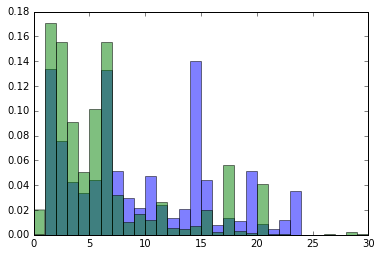

In [53]:
plt.figure()
day_bins = np.arange(0,31,1)
s_weights = np.ones_like(sample_len_and_time['days_since_touch'])/len(sample_len_and_time['days_since_touch'])
plt.hist(sample_len_and_time['days_since_touch'],alpha=0.5,color='b',bins=day_bins,weights=s_weights)
e_weights = np.ones_like(epa_len_and_time['days_since_touch'])/len(epa_len_and_time['days_since_touch'])
plt.hist(epa_len_and_time['days_since_touch'],alpha=0.5,color='g',bins=day_bins,weights=e_weights)
plt.show()

Hard limits on sampled pages: page_len > 400 and page_touched > 20160627000000 (previous 20 days)

days since touch bins: 0-5, 6-11, 12-17, 17+


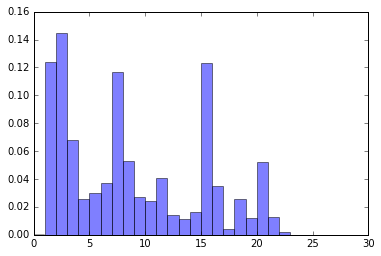

In [54]:
mini_sample = pd.read_csv("mini_sample.csv")
mini_sample['page_touched'] = pd.Series([pd.to_datetime(WikiTimeToUsefulTime(x)) for x in mini_sample['page_touched']])
mini_sample['days_since_touch'] = pd.Series([CalcDayDiff(x,pd.Timestamp("2016-07-19")) for x in mini_sample['page_touched']])
m_weights = np.ones_like(mini_sample['days_since_touch'])/len(mini_sample['days_since_touch'])

plt.figure()
plt.hist(mini_sample['days_since_touch'],alpha=0.5,bins=day_bins,weights=m_weights)
plt.show()

In [120]:
bins = np.arange(0,22000,2000)
samp_len_hist = np.histogram(sample_len_and_time['page_len'],bins=bins)
print("{}: {:3f}".format("sample",np.sum(samp_len_hist[0])/len(sample_len_and_time['page_len'])))
epa_len_hist = np.histogram(epa_len_and_time['page_len'],bins=bins)
print("{}: {:3f}".format("epa",np.sum(epa_len_hist[0])/len(epa_len_and_time['page_len'])))

sample: 0.918380
epa: 0.421871


In [68]:
e_bins = np.arange(0,28,7)
samp_edit_hist = np.histogram(sample_len_and_time['days_since_touch'],bins=e_bins)
print("{}: {:3f}".format("sample",np.sum(samp_edit_hist[0])/len(sample_len_and_time['days_since_touch'])))
epa_edit_hist = np.histogram(epa_len_and_time['days_since_touch'],bins=e_bins)
print("{}: {:3f}".format("epa",np.sum(epa_edit_hist[0])/len(epa_len_and_time['days_since_touch'])))

sample: 0.952950
epa: 0.984454


In [219]:
samp = np.histogram2d(sample_len_and_time['page_len'],sample_len_and_time['days_since_touch'],bins=[15,3],range=[[0,60000],[0,21]])
epa = np.histogram2d(epa_len_and_time['page_len'],epa_len_and_time['days_since_touch'],bins=[15,3],range=[[0,60000],[0,21]])

In [220]:
samp_norm = samp[0]/len(sample_len_and_time['page_len'])
samp_norm.T
samp_norm = samp_norm/samp_norm.sum()
epa_norm = epa[0]/len(sample_len_and_time['page_len'])
epa_norm.T
epa_norm = epa_norm/epa_norm.sum()
epa_norm.sum()

0.99999999999999978

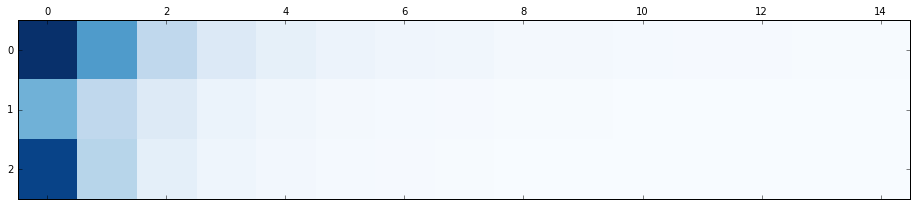

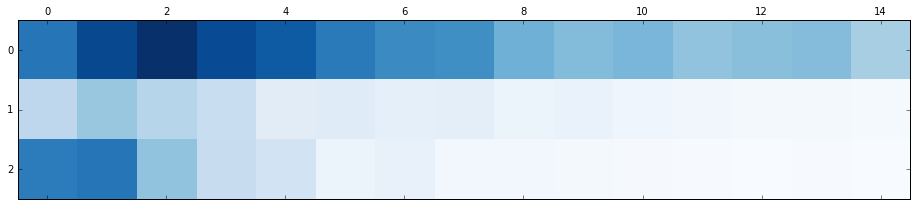

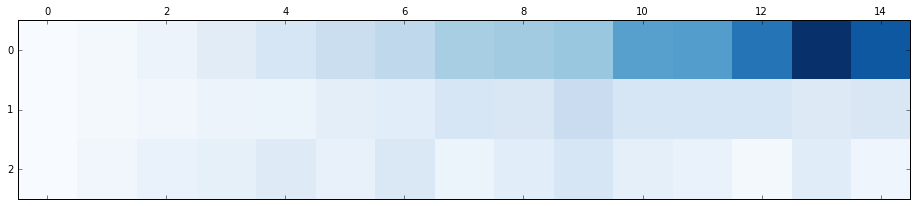

In [221]:
plt.matshow(samp_norm.T, cmap=plt.cm.Blues)
plt.show()
plt.matshow(epa_norm.T, cmap=plt.cm.Blues)
plt.show()
weights = epa_norm/samp_norm
plt.matshow(weights.T,cmap=plt.cm.Blues)
plt.show()

In [222]:
bin_weights = weights.T/np.amax(weights)

In [249]:
sampling_weights = np.ones([4,16])
sampling_weights[:3,:15] = bin_weights
sampling_weights[3:,:] = 0
sampling_weights

array([[ 0.0130353 ,  0.0276743 ,  0.06694643,  0.1190138 ,  0.17239859,
         0.22892272,  0.27953715,  0.34950969,  0.36857602,  0.39495262,
         0.56603423,  0.57752613,  0.7393918 ,  1.        ,  0.84702797,
         1.        ],
       [ 0.01018462,  0.02567577,  0.04166189,  0.06705097,  0.06117775,
         0.10754666,  0.11793422,  0.17132249,  0.15724563,  0.23611111,
         0.16647465,  0.16558442,  0.17183288,  0.14010989,  0.16071429,
         1.        ],
       [ 0.01361068,  0.04443658,  0.07783459,  0.09501348,  0.1335467 ,
         0.08186196,  0.15006088,  0.07005495,  0.11751152,  0.17075893,
         0.10119048,  0.07806122,  0.02845982,  0.12418831,  0.05059524,
         1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

Sampling idea:

Floor divide days_since_touch by 7, floor divide page_len by 4000, retrieve sampling_weights[fd_days][fd_len]

If rand < sample_weight, include row, else not.

In [224]:
day_index = np.floor_divide(sample_len_and_time['days_since_touch'], 7)
len_index = np.floor_divide(sample_len_and_time['page_len'],4000)
chooser = np.random.rand(100000)

In [225]:
row_weight = [sampling_weights[day_index[x]][len_index[x]] for x in range(len(chooser))]

/Users/brian/.pyenv/versions/3.5.1/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [226]:
chosen = chooser < row_weight

In [227]:
sample_len_and_time['in_sample'] = chosen

In [228]:
sample_chosen = sample_len_and_time[sample_len_and_time['in_sample']].copy()

In [229]:
sample_chosen

,page_id,page_len,page_touched,days_since_touch,in_sample
7,13718808,75773,2016-07-12,6.0,True
23,41207422,17325,2016-06-29,19.0,True
29,600417,83970,2016-07-17,1.0,True
57,17013685,1286,2016-07-06,12.0,True
81,35214925,3126,2016-07-06,12.0,True
86,93927,25160,2016-07-17,1.0,True
106,23805932,12492,2016-07-17,1.0,True
149,33030998,4173,2016-07-17,1.0,True
167,5317702,7488,2016-07-03,15.0,True
186,33416589,21584,2016-07-11,7.0,True


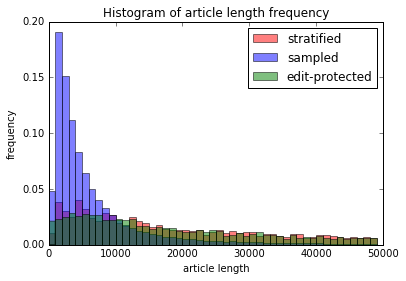

In [230]:
#len_bins = np.arange(0,64000,4000)
c_weights = np.ones_like(sample_chosen['page_len'])/len(sample_chosen['page_len'])
plt.hist(sample_chosen['page_len'],bins=len_bins,alpha=0.5,color='r',weights=c_weights,label='stratified')
plt.hist(sample_len_and_time['page_len'],alpha=0.5,color='b',bins=len_bins,weights=s_weights,label='sampled')
plt.hist(epa_len_and_time['page_len'],alpha=0.5,color='g',bins=len_bins,weights=e_weights,label='edit-protected')
plt.legend(loc='best')
plt.title("Histogram of article length frequency")
plt.xlabel("article length")
plt.ylabel("frequency")
plt.show()

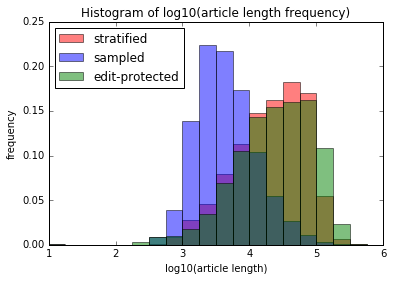

In [233]:
log_bins = np.arange(1,6.25,0.25)
plt.figure()
plt.hist(np.log10(sample_chosen['page_len']),bins=log_bins,alpha=0.5,color='r',weights=c_weights,label='stratified')
plt.hist(np.log10(sample_len_and_time['page_len']),alpha=0.5,color='b',bins=log_bins,weights=s_weights,label='sampled')
plt.hist(np.log10(epa_len_and_time['page_len']),alpha=0.5,color='g',bins=log_bins,weights=e_weights,label='edit-protected')
plt.legend(loc='best')
plt.title("Histogram of log10(article length frequency)")
plt.xlabel("log10(article length)")
plt.ylabel("frequency")
plt.show()

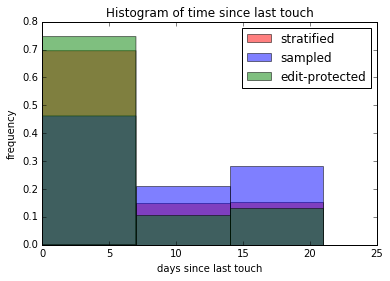

In [234]:
day_bins = np.arange(0,28,7)
c_weights = np.ones_like(sample_chosen['days_since_touch'])/len(sample_chosen['days_since_touch'])
plt.hist(sample_chosen['days_since_touch'],bins=day_bins,alpha=0.5,color='r',weights=c_weights,label='stratified')
plt.hist(sample_len_and_time['days_since_touch'],alpha=0.5,color='b',bins=day_bins,weights=s_weights,label='sampled')
plt.hist(epa_len_and_time['days_since_touch'],alpha=0.5,color='g',bins=day_bins,weights=e_weights,label='edit-protected')
plt.legend(loc='best')
plt.title("Histogram of time since last touch")
plt.xlabel("days since last touch")
plt.ylabel("frequency")
plt.show()

In [297]:
def CallWikipedia():
    wikiconn  = pymysql.connect(host='localhost',
                                user='s53070',
                                password='G1CX8Z5yIskLenRh',
                                port=4711,
                                db='enwiki_p',
                                charset='utf8')
    wikiCur = wikiconn.cursor()

In [301]:
CallWikipedia()

In [260]:
wikiCols = ['page_id','page_title','page_is_redirect','page_is_new',
            'page_random','page_touched','page_links_updated','page_latest','page_len']
colsforQ = ",".join(wikiCols)
wikiQ = '''SELECT {} FROM page
           WHERE page_namespace = 0 AND page_len > 400 AND page_touched > 20160627000000 AND
           page_random > {}
           ORDER BY page_random
           LIMIT 10000'''
preppedQ = wikiQ.format(colsforQ,0.3)
wikiCur.execute(preppedQ)

trial = list(wikiCur.fetchall())
trial

[(7565305,
  b'Sacramento_Executive_Airport',
  0,
  0,
  0.300000094946,
  b'20160718194717',
  b'20160715104902',
  677873764,
  9074),
 (35956234,
  b'Uranium_mining_by_country',
  0,
  0,
  0.300000199662,
  b'20160706150842',
  b'20160706150846',
  728624057,
  36676),
 (47803193,
  b'Asel_Sharbekova',
  0,
  0,
  0.300000582735,
  b'20160629205806',
  b'20160629230634',
  684308784,
  1455),
 (36380205,
  b'Abdollah_Givi',
  0,
  0,
  0.300000760525,
  b'20160704163201',
  b'20160713045703',
  546369688,
  1901),
 (10272948,
  b'Return_of_the_Street_Fighter',
  0,
  0,
  0.300001137803,
  b'20160712235751',
  b'20160713030015',
  647214662,
  2903),
 (47332369,
  b'Wabauskang_First_Nation',
  0,
  0,
  0.30000148861,
  b'20160704163201',
  b'20160713060728',
  686437708,
  2760),
 (35544729,
  b'Completely_Cilla:_1963-1973',
  0,
  0,
  0.300002054068,
  b'20160711090041',
  b'20160713070058',
  705375070,
  9288),
 (14925169,
  b'Gmina_Jab\xc5\x82onna,_Lublin_Voivodeship',
  0,


In [261]:
prev_random = trial[-1][4]
wikiTrial = pd.DataFrame(trial, columns=wikiCols)

In [305]:

def CleanDFfromWiki(wiki_SQL_df):
    wiki_SQL_df['page_title'] = [str(x, 'utf-8') for x in wiki_SQL_df['page_title']]
    wiki_SQL_df['page_touched'] = [int(str(x, 'utf-8')) for x in wiki_SQL_df['page_touched']]
    #wiki_SQL_df['page_links_updated'] = [int(str(x, 'utf-8')) for x in wiki_SQL_df['page_links_updated']]
    wiki_SQL_df['date_touched'] = pd.Series([pd.to_datetime(WikiTimeToUsefulTime(x)) for x in wiki_SQL_df['page_touched']])
    wiki_SQL_df['days_since_touch'] = pd.Series([CalcDayDiff(x, pd.Timestamp("2016-07-19")) for x in wiki_SQL_df['date_touched']])
    return wiki_SQL_df


#THIS BREAKS PAGE_RANDOM AS PANDAS DOES NOT STORE IT TO SUFFICIENT PRECISION



In [262]:
wikiTrial = CleanDFfromWiki(wikiTrial)
wikiTrial

,page_id,page_title,page_is_redirect,page_is_new,page_random,page_touched,page_links_updated,page_latest,page_len,date_touched,days_since_touch
0,7565305,Sacramento_Executive_Airport,0,0,0.300000,20160718194717,20160715104902,677873764,9074,2016-07-18,1.0
1,35956234,Uranium_mining_by_country,0,0,0.300000,20160706150842,20160706150846,728624057,36676,2016-07-06,13.0
2,47803193,Asel_Sharbekova,0,0,0.300001,20160629205806,20160629230634,684308784,1455,2016-06-29,20.0
3,36380205,Abdollah_Givi,0,0,0.300001,20160704163201,20160713045703,546369688,1901,2016-07-04,15.0
4,10272948,Return_of_the_Street_Fighter,0,0,0.300001,20160712235751,20160713030015,647214662,2903,2016-07-12,7.0
5,47332369,Wabauskang_First_Nation,0,0,0.300001,20160704163201,20160713060728,686437708,2760,2016-07-04,15.0
6,35544729,Completely_Cilla:_1963-1973,0,0,0.300002,20160711090041,20160713070058,705375070,9288,2016-07-11,8.0
7,14925169,"Gmina_Jabłonna,_Lublin_Voivodeship",0,0,0.300003,20160712213917,20160713022416,693130969,2677,2016-07-12,7.0
8,18003087,Louis_Peglion,0,0,0.300003,20160629205806,20160629220118,714522572,1506,2016-06-29,20.0
9,1585634,Ahe,0,0,0.300004,20160704191912,20160718044418,708866771,6812,2016-07-04,15.0


In [267]:
def SampleCols(clean_df,sample_weights=sampling_weights):
    day_index = np.clip(np.floor_divide(clean_df['days_since_touch'],7),0,15)
    len_index = np.clip(np.floor_divide(clean_df['page_len'],4000),0,4)
    chooser = np.random.rand(len(day_index))
    
    row_weight = [sample_weights[int(day_index[x])][len_index[x]] for x in range(len(chooser))]
    chosen = chooser < row_weight
    return chosen

In [270]:
chosen = SampleCols(wikiTrial)

In [273]:
chosen_rows = wikiTrial[wikiCols][chosen]

In [274]:
chosen_rows

,page_id,page_title,page_is_redirect,page_is_new,page_random,page_touched,page_links_updated,page_latest,page_len
45,7960121,Wyoming_Highway_22,0,0,0.300014,20160713030710,20160718171717,718541470,4002
63,32114346,Apolipoprotein_O,0,0,0.300018,20160716093923,20160716032735,721121830,2208
66,21391,Nigerian_Armed_Forces,0,0,0.300019,20160716103314,20160716054348,727643438,12194
80,1818940,Eastbourne_(UK_Parliament_constituency),0,0,0.300022,20160701151739,20160718052344,722867072,44494
119,19167764,Undergarment,0,0,0.300039,20160717030705,20160716065059,726831680,49221
130,231683,Norwegian_University_of_Science_and_Technology,0,0,0.300042,20160718121504,20160716210414,728774455,24585
182,1939585,Drowning_Mona,0,0,0.300059,20160718074808,20160718074808,730318784,7484
194,1066804,Arena_(Star_Trek:_The_Original_Series),0,0,0.300062,20160717114233,20160717114543,730003864,10983
224,27874760,2010_FIFA_World_Cup_event_effects,0,0,0.300072,20160704182417,20160704182418,728332594,36071
228,20067481,Harike_Wetland,0,0,0.300073,20160717085447,20160717082734,730180858,16815


In [281]:
import time

def SelectAndSampleCols(random_start, chosen_df=chosen_rows):
    preppedQ = wikiQ.format(colsforQ, random_start)
    wikiCur.execute(preppedQ)
    results = list(wikiCur.fetchall())
    next_random = results[-1][4]
    results_df = pd.DataFrame(results, columns=wikiCols)
    results_df = CleanDFfromWiki(results_df)
    
    new_rows = results_df[wikiCols][SampleCols(results_df)]
    
    return (next_random, pd.concat([chosen_rows,new_rows],ignore_index=True))

In [283]:
next_random, chosen_rows = SelectAndSampleCols(prev_random)

In [291]:
import datetime
now = datetime.datetime.now().time()
print("[{:02d}:{:02d}:{:02d}]".format(now.hour, now.minute, now.second))

[15:36:29]


In [316]:
wikiCur.close()
wikiconn.close()

wikiconn  = pymysql.connect(host='localhost',
                            user='s53070',
                            password='G1CX8Z5yIskLenRh',
                            port=4711,
                            db='enwiki_p',
                            charset='utf8')
wikiCur = wikiconn.cursor()

while len(chosen_rows) < 100000 and next_random < 1:
    now = datetime.datetime.now().time()
    ts = "[{:02d}:{:02d}:{:02d}]".format(now.hour, now.minute, now.second)
    print("{} {} records recovered.".format(ts,len(chosen_rows)))
    #try:
    next_random, chosen_rows = SelectAndSampleCols(next_random)
    #except:
        #CallWikipedia()
        #print("{} {}, reconnecting.".format(ts,"connection lost"))


[17:16:29] 44217 records recovered.
[17:17:27] 44618 records recovered.
[17:18:31] 45012 records recovered.
[17:19:17] 45415 records recovered.
[17:20:00] 45809 records recovered.
[17:20:46] 46229 records recovered.
[17:21:29] 46654 records recovered.
[17:22:05] 47087 records recovered.
[17:22:37] 47455 records recovered.
[17:23:08] 47852 records recovered.
[17:23:38] 48238 records recovered.
[17:24:15] 48643 records recovered.
[17:24:50] 49045 records recovered.
[17:25:27] 49439 records recovered.
[17:26:02] 49850 records recovered.
[17:26:36] 50240 records recovered.
[17:27:15] 50708 records recovered.
[17:27:57] 51106 records recovered.
[17:28:37] 51546 records recovered.
[17:29:23] 51947 records recovered.
[17:30:04] 52352 records recovered.
[17:30:49] 52780 records recovered.
[17:31:31] 53154 records recovered.
[17:32:13] 53570 records recovered.
[17:32:47] 53966 records recovered.
[17:33:21] 54355 records recovered.
[17:33:49] 54747 records recovered.
[17:34:19] 55122 records rec

KeyboardInterrupt: 

In [317]:
next_random

0.895041326575

In [308]:
len(chosen_rows)

10026

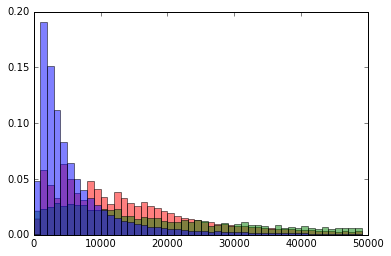

In [318]:
plt.figure()
ch_weights = np.ones_like(chosen_rows['page_len'])/len(chosen_rows['page_len'])
plt.hist(chosen_rows['page_len'],alpha=0.5,color='r',bins=len_bins,weights=ch_weights,label='stratified')
plt.hist(epa_len_and_time['page_len'],alpha=0.5,color='g',bins=len_bins,weights=e_weights,label='edit-protected')
plt.hist(sample_len_and_time['page_len'],alpha=0.5,color='b',bins=len_bins,weights=s_weights,label='sampled')
plt.show()

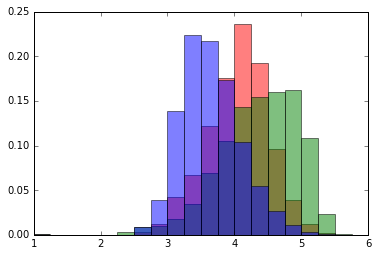

In [319]:
plt.figure()
ch_weights = np.ones_like(chosen_rows['page_len'])/len(chosen_rows['page_len'])
plt.hist(np.log10(chosen_rows['page_len']),alpha=0.5,color='r',bins=log_bins,weights=ch_weights,label='stratified')
plt.hist(np.log10(epa_len_and_time['page_len']),alpha=0.5,color='g',bins=log_bins,weights=e_weights,label='edit-protected')
plt.hist(np.log10(sample_len_and_time['page_len']),alpha=0.5,color='b',bins=log_bins,weights=s_weights,label='sampled')
plt.show()

In [320]:
chosen_rows['page_info_pulled'] = 20160719000000

In [321]:
select_train = np.random.rand(chosen_rows.shape[0])
is_train = np.array(select_train > 0.25).astype(int)
chosen_rows['page_in_train'] = is_train

In [322]:
chosen_rows['page_is_ep'] = 0

In [328]:
chosen_rows['page_batch'] = 0
batches = np.arange(0,80208,10026)

batches = np.append(batches,77848)
batches

array([    0, 10026, 20052, 30078, 40104, 50130, 60156, 70182, 77848])

In [331]:
batch = np.zeros(77848)
for i in range(len(batches)-1):
    batch[batches[i]:batches[i+1]] = i+1

In [333]:
chosen_rows['page_batch'] = batch

In [336]:
chosen_rows[chosen_rows['page_batch'] == 8]

,page_id,page_title,page_is_redirect,page_is_new,page_random,page_touched,page_links_updated,page_latest,page_len,page_info_pulled,page_in_train,page_is_ep,page_batch
70182,147123,John_III_of_Portugal,0,0,0.834397,20160718072230,b'20160716085032',724519710,34178,20160719000000,1,0,8.0
70183,34877618,Koryo_International_College,0,0,0.834397,20160708233458,b'20160708205952',686652559,1005,20160719000000,1,0,8.0
70184,32455417,"Valley_Junction,_Wisconsin",0,0,0.834401,20160704163201,b'20160713043540',655136500,3088,20160719000000,0,0,8.0
70185,10791072,Made_in_U.S.A._(The_Beach_Boys_album),0,0,0.834405,20160716000006,b'20160715232647',698983372,5753,20160719000000,1,0,8.0
70186,95062,"Missaukee_County,_Michigan",0,0,0.834411,20160717100938,b'20160716104041',728137173,14398,20160719000000,1,0,8.0
70187,31190269,1995_Yokohama_Marinos_season,0,0,0.834415,20160717003842,b'20160718215518',654567926,49986,20160719000000,1,0,8.0
70188,940565,Monsoon_Wedding,0,0,0.834443,20160717124121,b'20160716102057',728713446,12126,20160719000000,1,0,8.0
70189,3751377,Kevin_Carter_(American_football),0,0,0.834452,20160718013640,b'20160719000532',711489392,22242,20160719000000,1,0,8.0
70190,30547984,Thermal_wheel,0,0,0.834452,20160708114047,b'20160708114050',728897739,9311,20160719000000,1,0,8.0
70191,2834063,Peanut_allergy,0,0,0.834478,20160718163328,b'20160718163330',730373144,27293,20160719000000,1,0,8.0


In [341]:
cols = ['page_id']
page_id_Q = "SELECT page_id FROM core WHERE page_is_ep = 1"
cur.execute(page_id_Q)
epa_ids = pd.DataFrame(list(cur.fetchall()),columns=cols)

In [349]:
new_rows = chosen_rows[~(chosen_rows['page_id'].isin(epa_ids['page_id']))].copy()
new_rows['page_links_updated'] = new_rows['page_links_updated'].convert_objects(convert_numeric=True)
new_rows = new_rows.where((pd.notnull(new_rows)), None)
core_records = new_rows.to_dict(orient='records')

/Users/brian/.pyenv/versions/3.5.1/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [351]:
cur.execute("SET autocommit=0")

0

In [350]:
def BatchInsertRecordsFromListOfDicts(table, records, cursor=cur, connection=connection):
    insert = "INSERT IGNORE INTO {}({}) VALUES ({})"
    cols = ",".join(list(records[0].keys()))
    val_format = ",".join(['%s']*len(list(records[0].keys())))
    formatI = insert.format(table, cols, val_format)
    totRecords = len(records)
    for ix,record in enumerate(records):
        if (ix + 1) % 500 == 0:
            print("{} of {} records processed".format(ix + 1,totRecords))
        values = list(record.values())
        cur.execute(formatI,values)
    print("Finished; committing transaction.")
    connection.commit()
    print("Done!")

In [352]:
BatchInsertRecordsFromListOfDicts('core',core_records)

500 of 77286 records processed
1000 of 77286 records processed
1500 of 77286 records processed
2000 of 77286 records processed
2500 of 77286 records processed
3000 of 77286 records processed
3500 of 77286 records processed
4000 of 77286 records processed
4500 of 77286 records processed
5000 of 77286 records processed
5500 of 77286 records processed
6000 of 77286 records processed
6500 of 77286 records processed
7000 of 77286 records processed
7500 of 77286 records processed
8000 of 77286 records processed
8500 of 77286 records processed
9000 of 77286 records processed
9500 of 77286 records processed
10000 of 77286 records processed
10500 of 77286 records processed
11000 of 77286 records processed
11500 of 77286 records processed
12000 of 77286 records processed
12500 of 77286 records processed
13000 of 77286 records processed
13500 of 77286 records processed
14000 of 77286 records processed
14500 of 77286 records processed
15000 of 77286 records processed
15500 of 77286 records process